In [1]:
import pandas as pd
import numpy as np

df=pd.read_csv('Cleaned_data.csv')
df

,Unnamed: 0,Date,PS,WS10M,WS10M_RANGE,WD10M,T2M,RH2M,PRECTOTCORR,ALLSKY_SFC_SW_DWN,Visibility,Cloud Cover,Conditions,weather_type
0,0,2017-01-01,101.27,0.86,1.29,142.25,19.87,72.81,0.00,138.71,2.5,0.4,Clear,Mist
1,1,2017-01-02,101.27,0.95,1.33,194.31,19.83,75.44,3.69,135.58,1.1,0.7,Clear,Fog
2,2,2017-01-03,101.24,2.49,2.16,325.44,18.69,83.31,2.25,134.17,4.0,1.0,Clear,Smoke Or Haze
3,3,2017-01-04,101.15,2.86,1.96,337.94,18.01,79.00,0.00,148.32,4.0,0.9,Clear,Smoke Or Haze
4,4,2017-01-05,101.13,2.80,2.20,333.69,17.16,72.50,0.00,166.91,4.0,0.7,Clear,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2263,2263,2023-03-16,100.76,3.98,5.09,174.88,26.80,64.75,2.49,199.41,3.9,97.6,Overcast,Overcast
2264,2264,2023-03-17,100.88,1.73,3.81,148.31,25.20,73.06,4.11,93.95,3.9,98.8,Overcast,Overcast
2265,2265,2023-03-18,100.77,1.32,3.14,215.88,26.46,65.06,2.20,93.95,4.0,96.9,Overcast,Overcast
2266,2266,2023-03-19,100.62,3.70,4.26,188.81,24.49,74.62,2.14,93.95,4.0,99.3,Overcast,Overcast


In [2]:
dft=df[['Date','T2M']]
dft
dft.index = pd.to_datetime(dft.Date)
dft=dft.drop('Date',axis=1)
dft

,T2M
Date,
2017-01-01,19.87
2017-01-02,19.83
2017-01-03,18.69
2017-01-04,18.01
2017-01-05,17.16
...,...
2023-03-16,26.80
2023-03-17,25.20
2023-03-18,26.46


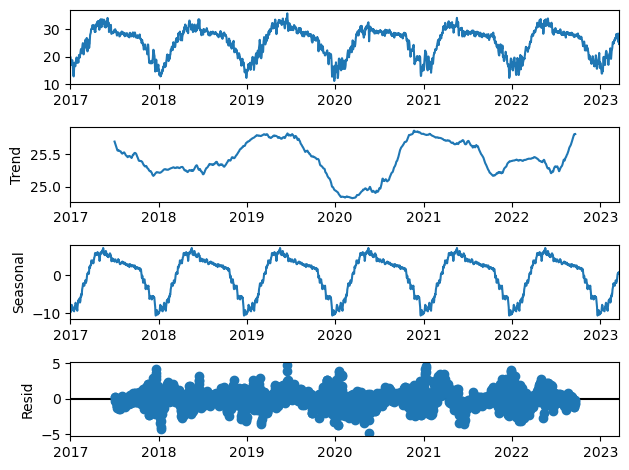

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

result = seasonal_decompose(dft,period=365)
result.plot()
plt.show()

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


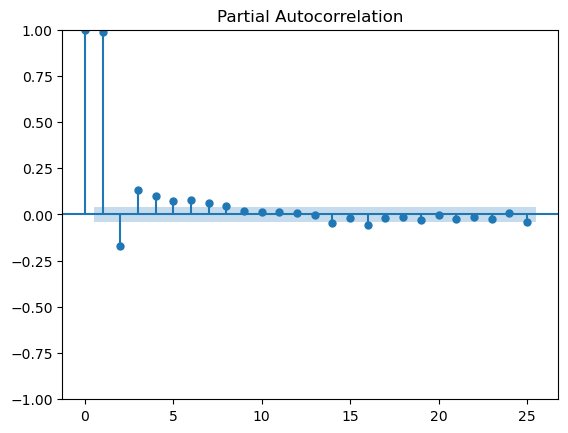

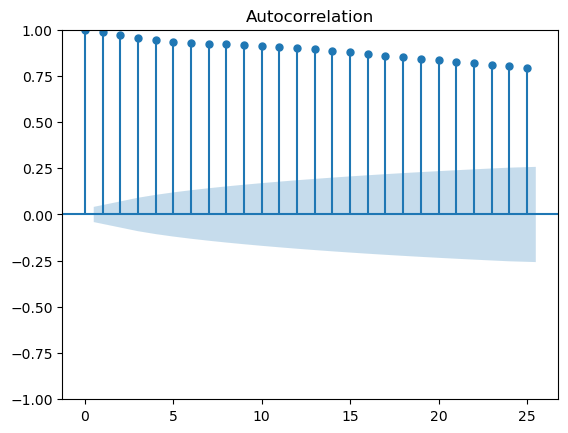

In [4]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
pacf=plot_pacf(dft,lags=25)
acf=plot_acf(dft,lags=25)

In [5]:
from statsmodels.tsa.stattools import adfuller
adfuller_result = adfuller(dft, autolag='AIC')

print(f'ADF Statistic: {adfuller_result[0]}')

print(f'p-value: {adfuller_result[1]}')

for key, value in adfuller_result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -4.081677142119762
p-value: 0.0010383154812789158
Critial Values:
   1%, -3.433272682848605
Critial Values:
   5%, -2.86283115989218
Critial Values:
   10%, -2.567457345543686


In [6]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
# stepwise_fit =auto_arima(dft, start_p=3, d=None, start_q=1, max_p=12, max_d=2, max_q=10, start_P=1, D=None, start_Q=1, max_P=5, max_D=2, max_Q=5,m=365,seasonal=True ,information_criterion='aic', stepwise=True, maxiter=50, suppress_warnings=True)        
# stepwise_fit.summary()
stepwise_fit =auto_arima(dft, trace=True, suppress_warnings=True)        
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=5499.974, Time=1.79 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=13927.763, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=5641.938, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=11191.116, Time=0.26 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=21190.306, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=5557.047, Time=0.69 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=5562.884, Time=0.95 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=5484.617, Time=1.94 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=5483.504, Time=1.52 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=5541.734, Time=0.34 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=5484.795, Time=2.11 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=5580.192, Time=0.28 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=5520.757, Time=0.74 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=5488.274, Time=2.56 sec
 ARIMA(3,0,1)(0,0,0)[0]       

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2268
Model:               SARIMAX(3, 0, 1)   Log Likelihood               -2735.752
Date:                Tue, 11 Apr 2023   AIC                           5483.504
Time:                        10:44:42   BIC                           5517.864
Sample:                             0   HQIC                          5496.040
                               - 2268                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0566      0.023      2.452      0.014       0.011       0.102
ar.L1          1.8844      0.043     43.803      0.000       1.800       1.969
ar.L2         -1.1488      0.048    -23.775      0.000      -1.243      -1.054
ar.L3          0.2621      0.017     15.360      0.000       0.229       0.296
ma.L1         -0.7411      0.044    -16.820      0.000      -0.827      -0.655
sigma2         0.6524      0.016     41.881      0.000       0.622       0.683
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               263.57
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               1.07   Skew:                            -0.46
Prob(H) (two-sided):                  0.32   Kurtosis:                         4.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [7]:
print(dft.shape)
train=dft.iloc[:-30]
test=dft.iloc[-30:]
print(train.shape,test.shape)
print(test.iloc[0],test.iloc[-1])

(2268, 1)
(2238, 1) (30, 1)
T2M    23.19
Name: 2023-02-19 00:00:00, dtype: float64 T2M    25.83
Name: 2023-03-20 00:00:00, dtype: float64


In [10]:
#test=dft.iloc[-40:]

In [8]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train,order=(3,0,1))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    T2M   No. Observations:                 2238
Model:                 ARIMA(3, 0, 1)   Log Likelihood               -2693.203
Date:                Tue, 11 Apr 2023   AIC                           5398.406
Time:                        10:44:56   BIC                           5432.686
Sample:                             0   HQIC                          5410.921
                               - 2238                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.6613      1.989     12.400      0.000      20.763      28.559
ar.L1          1.8922      0.042     45.593      0.000       1.811       1.974
ar.L2         -1.1658      0.047    -24.762      0.000      -1.258      -1.073
ar.L3          0.2714      0.017     15.715      0.000       0.238       0.305
ma.L1         -0.7428      0.043    -17.442      0.000      -0.826      -0.659
sigma2         0.6487      0.016     41.815      0.000       0.618       0.679
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               258.62
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               1.04   Skew:                            -0.44
Prob(H) (two-sided):                  0.55   Kurtosis:                         4.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [14]:
start=len(train)
end=len(train)+len(test)-1
#if the predicted values dont have date values as index, you will have to uncomment the following two commented lines to plot a graph
#index_future_dates=pd.date_range(start='2018-12-01',end='2018-12-30')

pred=model.predict(start=start,end=end,typ='levels')
#pred=model.predict(start=start-10,end=end,typ='levels')
#pred.index=index_future_dates

<Axes: xlabel='Date'>

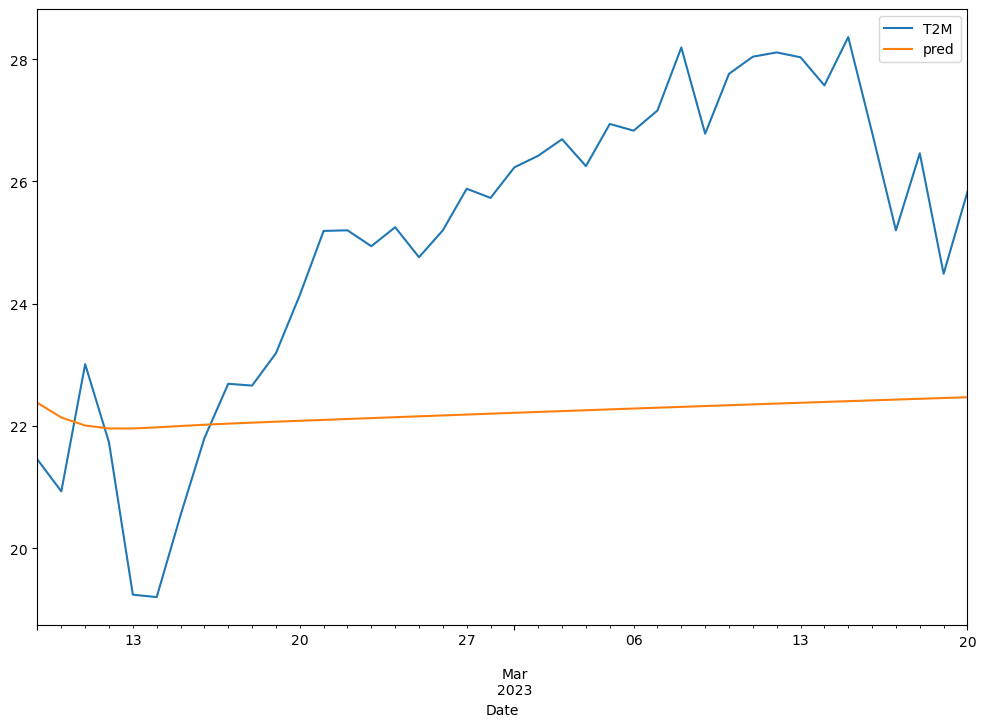

In [15]:
from matplotlib import pyplot
dft1=test.copy()
dft1['pred']=pred.values
dft1[['T2M','pred']].plot(figsize=(12,8))

In [11]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model_seasonal = SARIMAX(train, order=(3,0,1), seasonal_order=(3,0,1,365))
model_fit_seasonal = model_seasonal.fit()
#model = SARIMAX(ts_train, order=(20,0,50))
#model_fit = model.fit()

KeyboardInterrupt: 